## 2. EDOs lineares de 2ª ordem
Uma boa razão para estudar equações lineares de segunda ordem é que elas são essenciais para qualquer investigação séria das áreas clássicas da Física-Matemática. Não se pode progredir muito no estudo de mecânica dos fluidos, condução de calor, movimento ondulatório ou fenômenos eletromagnéticos sem esbarrar na necessidade de resolver equações diferenciais lineares de segunda ordem. Vamos ilustrar isso mais a frente com uma discussão de oscilações de alguns sistemas mecânicos e elétricos básicos.

### 2.1 Equações diferenciais homogêneas com coeficientes constantes

As equações diferenciais homogêneas com coeficientes constantes e de 2ª ordem são aquelas que podem ser escritas na forma 

$$ay''+by'+cy=0$$

com $a$, $b$ e $c$ constantes.

Sabemos que se a equação característica $ar^2+br+c=0$ possuir **duas raízes reais e distintas** $r_ 1$ e $r_2$, em que $r_1 \neq r_2$, então  $y_1(t)=e^{r_1t}$ e $y_2(t)=e^{r_2t}$ são duas soluções da equação diferencial. Além disso, a combinação linear dessas duas soluções, ou seja, a função

$$ y = c_1e^{r_1t} + c_2e^{r_2t}$$

também é uma solução (confira!).   

Se estivermos interessados em um elemento particular da família de soluções que satisfaz as condições iniciais 

$$y(t_0)=y_0 \,\,\,\, \text{e}\,\,\,\, y'(t_0)=y'_0$$  

então, substituimos na equação e podemos obter

$$c_1=\frac{y'_0-y_0r_2}{r_1-r_2}e^{-r_1t_0}\,\,\,\, \text{e}\,\,\,\,c_2=\frac{y_0r_1-y'_0}{r_1-r_2}e^{-r_2t_0}$$


**Exemplo 1.15:** Encontre a solução do problema de valor inicial

$$y''+5y'+6y=0  \, \text{,}\,\, y(0)=2 \,\, \text{e}\,\, y'(0)=3$$ 

_Solução:_ 

As raízes de $r^2+5r+6=0$ são $r_1=-2$ e $r_2=-3$. Então a solução geral da equação é

$$ y = c_1e^{-2t}+c_2e^{⁻3t}$$

Aplicando a primeira condição inicial $y(0)=2$ obtemos $c_1+c_2=2$. 

Aplicando a segunda condição inicial $y'(0)=3$ obtemos $-2c_1-3c_2=3$.

Resolvendo o sistema linear formado por essas duas equações obtemse $c_1=9$ e $c_2=-7$, então a solução particular é 

$$y=9e^{-2t}-7e^{-3t}$$

Vejamos agora como usar as bibliotecas computacionais para obter essa solução.

In [1]:
import sympy as sym
sym.init_printing()

In [2]:
r, c1, c2 = sym.symbols('r, c1, c2')

In [3]:
#resolvendo a equação característica 
sym.solve(r**2+5*r+6)

[-3, -2]

In [4]:
#escrevendo a solução geral
t = sym.symbols('t')
y = sym.Function('y')(t)
y = c1*sym.exp(-2*t)+c2*sym.exp(-3*t)
y

    -2⋅t       -3⋅t
c₁⋅ℯ     + c₂⋅ℯ    

In [5]:
# verificando a solução
sym.simplify(y.diff(t,t)+ 5*y.diff(t)+6*y)

0

In [6]:
dy = sym.lambdify(t, y.diff(t))
y = sym.lambdify(t, y)

In [7]:
y(0)

1.0⋅c₁ + 1.0⋅c₂

In [8]:
dy(0)

-2.0⋅c₁ - 3.0⋅c₂

In [9]:
eq1 = sym.Eq(y(0),2)
eq2 = sym.Eq(dy(0),3)

In [10]:
C = sym.solve([eq1,eq2])
C

{c₁: 9.0, c₂: -7.0}

In [11]:
s_part = C[c1]*sym.exp(-2*t)+C[c2]*sym.exp(-3*t)
s_part

     -2⋅t        -3⋅t
9.0⋅ℯ     - 7.0⋅ℯ    

O mesmo resultado poderia ser obtido fazendo simplesmente

In [12]:
y = sym.Function('y')(t)
eq = y.diff(t,t)+5*y.diff(t)+6*y
sym.dsolve(eq, y)

       ⎛         -t⎞  -2⋅t
y(t) = ⎝C₁ + C₂⋅ℯ  ⎠⋅ℯ    

Para adicionar condições iniciais, podemos complementar o comando adicionando `ics={y(0): 2, y.diff(t).subs(t, 0): 3}` dentro do `dsolve`

In [13]:
sol = sym.dsolve(eq, y, ics={y.subs(t, 0):2, y.diff(t).subs(t, 0): 3})
sol

       ⎛       -t⎞  -2⋅t
y(t) = ⎝9 - 7⋅ℯ  ⎠⋅ℯ    

Plotando a solução particular

In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
# sol.rhs é o lado direito da equação sol
f = sym.lambdify(t,sol.rhs)

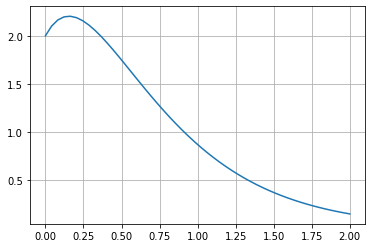

In [16]:
t = np.linspace(0,2)
plt.plot(t, f(t))
plt.grid()
plt.show()

**Curiosidade:** O que acontece se eu plotar várias cuvas para várias soluções?

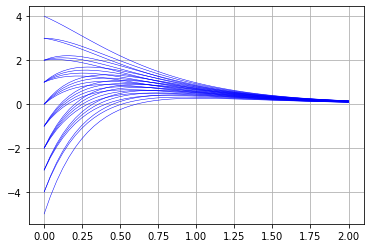

In [17]:
f = lambda t,c1,c2: (c1-c2*np.exp(-t))*np.exp(-2*t)
for c1 in np.arange(6,10):
    for c2 in np.arange(5,12):
        plt.plot(t, f(t,c1,c2),'b-',lw=0.5)
plt.grid()
plt.show()

**Exercícios:**
(Boyce, p75)

In [18]:
x = sym.symbols('x')
q = sym.symbols('q', cls=sym.Function)
eq = x**2*q(x).diff(x,x) + x*q(x).diff(x) - q(x)
sym.dsolve(eq, q(x))

       C₁       
q(x) = ── + C₂⋅x
       x        

**Exercício:**
1. (a) Encontre a solução do problema de valor inicial $4y"-8y'+3y=0$, $y(0)=2$, $y'(0)=1/2.$ _(Solução: Boyce, p74, exemplo 4)_ (b)Encontre as coordenadas do ponto de máximo da solução do exercício 1. _(Solução: Boyce, p74, exemplo 5)_


Se a equação característica $ar^2+br+c=0$ possuir **raízes complexas conjugadas** $r_ 1 = \lambda + i\mu$ e $r_2 = \lambda - i\mu$, então a solução geral da equação diferencial é a função


$$ y = c_1 e^{\lambda t} cos(\mu t)+c_2 e^{\lambda t} sen(\mu t)$$

**Exemplo:** Encontre a solução do problema de valor inicial $16y"-8y'+145y=0$, $y(0)=-2$ e $y'(0)=1$.

In [19]:
t = sym.symbols('t')
y = sym.Function('y')(t)
eq = 16*y.diff(t,t)-8*y.diff(t)+145*y
sol_g = sym.dsolve(eq, y)
sol_g

                                    t
                                    ─
                                    4
y(t) = (C₁⋅sin(3⋅t) + C₂⋅cos(3⋅t))⋅ℯ 

In [20]:
sol_p = sym.dsolve(eq, y, ics={y.subs(t, 0):-2, y.diff(t).subs(t, 0): 1})
sol_p

                                t
                                ─
       ⎛sin(3⋅t)             ⎞  4
y(t) = ⎜──────── - 2⋅cos(3⋅t)⎟⋅ℯ 
       ⎝   2                 ⎠   

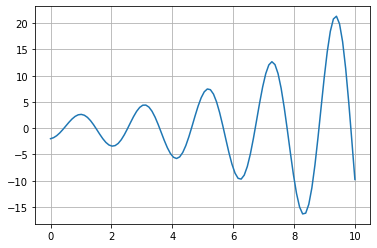

In [21]:
f = sym.lambdify(t,sol_p.rhs)
t = np.linspace(0,10,100)
plt.plot(t, f(t))
plt.grid()
plt.show()

In [22]:
print(sol_g.rhs)

(C1*sin(3*t) + C2*cos(3*t))*exp(t/4)


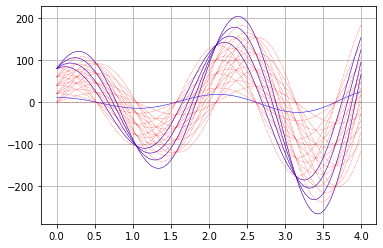

In [23]:
sols = lambda t,c1,c2: (c1*np.sin(3*t) + c2*np.cos(3*t))*np.exp(t/4)
t = np.linspace(0,4,100)

for c1 in range(0,100,20):
    plt.plot(t, sols(t, c1,c2), 'b-', lw=0.5)
    for c2 in range(0,100,20):
        plt.plot(t, sols(t, c1,c2), 'r:', lw=0.5)
plt.grid()
plt.show()

**Exemplo:** Encontre a solução do problema de valor inicial $y"+9y'=0$.

In [24]:
t = sym.symbols('t')
y = sym.Function('y')(t)
eq = y.diff(t,t)+9*y
sol_g = sym.dsolve(eq, y)
sol_g

y(t) = C₁⋅sin(3⋅t) + C₂⋅cos(3⋅t)

In [25]:
print(sol_g.rhs)

C1*sin(3*t) + C2*cos(3*t)


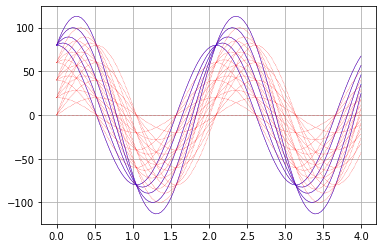

In [26]:
sols = lambda t,C1,C2: C1*np.sin(3*t) + C2*np.cos(3*t)
t = np.linspace(0,4,100)

for c1 in range(0,100,20):
    plt.plot(t, sols(t, c1,c2), 'b-', lw=0.5)
    for c2 in range(0,100,20):
        plt.plot(t, sols(t, c1,c2), 'r:', lw=0.5)
plt.grid()
plt.show()

Por fim, se a equação característica $ar^2+br+c=0$ possuir **raízes iguais** $r_1 = r_2$, então a solução geralé dada por 

$$ y = c_1e^{r_1t}+c_2 t e^{r_2t}$$

**Exemplo:**
Encontre a solução do problema de valor inicial $y"-y'+0.25y=0$, $y(0)=2$ e $y'(0)=1/3$.

In [27]:
t = sym.symbols('t')
y = sym.Function('y')(t)
eq = y.diff(t,t)-y.diff(t)+0.25*y
sym.dsolve(eq, y)


           0.499999999999937⋅t       0.500000000000057⋅t
y(t) = C₁⋅ℯ                    + C₂⋅ℯ                   

Ops! Aqui parece que algo não deu certo, o que será??? 

In [28]:
#resolvendo a equação característica 
sym.solve(r**2-r+0.25)

[0.5]

Raízes iguais!!! A solução geral é $y(t) = C_1 e^{0.5t} + C_2te^{0.5t}$

A solução geral para equações não homogêneas $ay"+by'+cy=g(t)$ obtida pelo **método dos coeficientes indeterminados** tem a forma $y(t)=c_1y_1(t)+c_2y_2(t)+Y(t)$ onde $y_1$ e $y_2$ são as soluções da equação homogênea associada e $Y(t)$ é alguma solução específica da equação não homogênea. 

A função $Y(t)$ pode ser encontrada calculando coeficientes de uma combinação linear de funções exponenciais, seno, cosseno, polinômios, somas ou produtos dessas funções dependendo da forma da  função $g(t)$. 

Os exemplos a seguir dão um panorama de como proceder para obter uma solução geral.



**Exemplo 1:** Encontre uma solução particular $Y(t)$ para $y"-3y'-4y=3e^{2t}$. Então escreva a solução geral.

Fazendo $Y(t)=Ae^{2t}$ derivando e substituindo no lado esquerdo da equação, temos:

In [29]:
A = sym.symbols('A')
Y = sym.Function('Y')(t)
Y = A*sym.exp(2*t) 
expr = Y.diff(t,t)-3*Y.diff(t)-4*Y
expr

      2⋅t
-6⋅A⋅ℯ   

Igualando com o lado direito da equação, ou sejan fazendo $-6Ae^{2t} = 3e^{2t}$ tem-se que $A=-1/2$, portanto $Y(t) = -\frac{1}{2}e^{2t}$. Resolvendo a equação característica:

In [30]:
r = sym.symbols('r')
sym.solve(r**2-3*r-4)

[-1, 4]

Escrevemos a solução geral como $y(t) = C_1e^{-t}+C_2e^{4t}-\frac{1}{2}e^{2t}$. Podemos confirmar a solução obtida usando os comandos abaixo:


In [31]:
eq = y.diff(t,t)-3*y.diff(t)-4*y-3*sym.exp(2*t)
sym.dsolve(eq, y)

                           2⋅t
           -t       4⋅t   ℯ   
y(t) = C₁⋅ℯ   + C₂⋅ℯ    - ────
                           2  

**Exemplo 2:** Encontre uma solução particular $Y(t)$ para $y"-3y'-4y=2sen(t)$. Então escreva a solução geral.

Fazendo $Y(t)=Asen(t) + Bcos(t)$ derivando e substituindo no lado esquerdo da equação, temos:

In [32]:
A, B = sym.symbols('A, B')
Y = sym.Function('Y')(t)
Y = A*sym.sin(t) + B*sym.cos(t)
expr = Y.diff(t,t)-3*Y.diff(t)-4*Y
expr

-4⋅A⋅sin(t) - 3⋅A⋅cos(t) + 3⋅B⋅sin(t) - 4⋅B⋅cos(t) - (A⋅sin(t) + B⋅cos(t))

Fatorando para colocar $cos(t)$ e $sen(t)$ em evidência

In [33]:
fact = sym.factor(expr, [sym.cos(t), sym.sin(t)])
fact

-(3⋅A + 5⋅B)⋅cos(t) - (5⋅A - 3⋅B)⋅sin(t)

In [34]:
eq1 = sym.Eq(-3*A-5*B, 0)
eq2 = sym.Eq(-5*A+3*B, 2)

In [35]:
sym.solve([eq1,eq2])

{A: -5/17, B: 3/17}

Escrevemos a solução geral como $y(t) = C_1e^{-t}+C_2e^{4t}-\frac{5}{17}sen(t)+\frac{3}{17}cos(t)$. Podemos confirmar a solução obtida usando os comandos abaixo:

In [36]:
eq = y.diff(t,t)-3*y.diff(t)-4*y-2*sym.sin(t)
sym.dsolve(eq, y)

           -t       4⋅t   5⋅sin(t)   3⋅cos(t)
y(t) = C₁⋅ℯ   + C₂⋅ℯ    - ──────── + ────────
                             17         17   

**Exemplo 3:** Use o método dos coeficientes indeterminados para encontrar uma solução particular $Y(t)$ para $y"-3y'-4y=-8e^tcos(2t)$. Então escreva a solução geral.

In [37]:
# A resposta procurada é dada por 
eq = y.diff(t,t)-3*y.diff(t)-4*y-8*sym.exp(t)*sym.cos(2*t)
sym.dsolve(eq, y)

                                                      t
           -t       4⋅t   2⋅(-sin(2⋅t) - 5⋅cos(2⋅t))⋅ℯ 
y(t) = C₁⋅ℯ   + C₂⋅ℯ    + ─────────────────────────────
                                        13             

**Exemplo 4:** Use o método dos coeficientes indeterminados para encontrar uma solução particular $Y(t)$ para $y"-3y'-4y=3e^{2t}+2sen(t)-8e^tcos(2t)$. Então escreva a solução geral.

In [38]:
# A resposta procurada é dada por 
eq = y.diff(t,t)-3*y.diff(t)-4*y-3*sym.exp(2*t)+2*sym.sin(t)-8*sym.exp(t)*sym.cos(2*t)
sym.dsolve(eq, y)

                                                      t    2⋅t                
           -t       4⋅t   2⋅(-sin(2⋅t) - 5⋅cos(2⋅t))⋅ℯ    ℯ      5⋅sin(t)   3⋅
y(t) = C₁⋅ℯ   + C₂⋅ℯ    + ───────────────────────────── - ──── + ──────── - ──
                                        13                 2        17        

      
cos(t)
──────
 17   

Pelo **método da variação dos parâmetros**, se as funções $p$, $q$ e $g$ forem contínuas num intervalo aberto $I$ e se as funções $y_ 1$ e $y_2$ formarem um conjunto fundamental de soluções da equação homogênea associada à equação $y"+p(t)y'+q(t)y=g(t)$, então, uma solução particular é 

$$ Y(t) = -y_1(t) \int_{t_0}^t \frac{y_2(s)g(s)}{W(y_1,y_2)(s)}ds + y_2(t) \int_{t_0}^t \frac{y_1(s)g(s)}{W(y_1,y_2)(s)}ds$$

onde $t_0$ é qualquer ponto escolhido convenientemente em $I$ e $W$ é o Wronskiano 

$$ W = 
\left| 
\begin{array}{cc}
y_1(s) & y_2(s)   \\ 
y'_1(s)& y'_2(s)   \\
\end{array} 
\right| = 
y_1(s)y'_2(s) - y'_1(s)y_2(s)$$

A solução geral será 

$$y = c_1y_1(t)+c_2y_2(t)+Y(t)$$


**Exemplo:**  Use o método da variação dos parâmetros para solucionar $y"-5y'+6y=2e^t$. Então escreva a solução geral.

In [39]:
# raízes da equação característica
r = sym.symbols('r')
sym.solve(r**2 - 5*r + 6)

[2, 3]

In [40]:
# calculando o Wronskiano
s = sym.symbols('s')
w = sym.wronskian([sym.exp(2*s), sym.exp(3*s)], s, method='bareiss')
w

 5⋅s
ℯ   

In [41]:
# calculando as integrais
y1 = sym.exp(2*s)
y2 = sym.exp(3*s)
g = 2*sym.exp(s)

I1 = sym.integrate( y2*g/w, (s,0,t))
I1

       -t
2 - 2⋅ℯ  

In [42]:
I2 = sym.integrate( y1*g/w, (s,0,t))
I2

     -2⋅t
1 - ℯ    

In [43]:
# Escrevendo a equação geral
C1, C2 = sym.symbols('c_1 c_2')
y1 = sym.exp(2*t)
y2 = sym.exp(3*t)
g = 2*sym.exp(t)
Y = -y2*I1+y1*I2
sym.simplify(sym.Eq(y, C1*y1+C2*y2 + Y))


           2⋅t       3⋅t      3⋅t      2⋅t    
y(t) = c₁⋅ℯ    + c₂⋅ℯ    - 2⋅ℯ    + 3⋅ℯ    - 1

Fazendo 

O mesmo pode ser obtido fazendo

In [44]:
t = sym.symbols('t')
y = sym.Function('y')(t)
eq = y.diff(t,t)-5*y.diff(t)+6*y-2*sym.exp(t)
sym.dsolve(eq, y)

       ⎛    t       2⋅t    ⎞  t
y(t) = ⎝C₁⋅ℯ  + C₂⋅ℯ    + 1⎠⋅ℯ 

**Referências**

BOYCE, William E. Equações Diferenciais Elementares e Problemas de Valores de Contorno. Grupo GEN, 2020. E-book. ISBN 9788521637134. Disponível em: https://integrada.minhabiblioteca.com.br/#/books/9788521637134/. Acesso em: 19 mar. 2023.

KONG, Qingkai; SIAUW, Timmy; BAYEN, Alexandre M. Python Programming and Numerical Methods: A Guide For Engineers And Scientists. ed 1, Academic Press, 2021. DOI: https://doi.org/10.1016/C2018-0-04165-1. Disponível em:
https://pythonnumericalmethods.berkeley.edu/notebooks/Index.html. Acesso em: 23 mar. 2023


LANGTANGEN, Hans Pette. A Primer on Scientific Programming with Python. Texts in Computational Science and Engineering. Springer Berlin, Heidelberg, ed 5, 2016. DOI: https://doi.org/10.1007/978-3-662-49887-3. Acesso em: 21 mar. 2023.

LEBL, Jiří. Differential Equations for Engineers. Amazon KDP edition, 2022. ISBN-13: 978-1-70623-023-6. Disponível em 
https://www.jirka.org/diffyqs/html/intfactor_section.html. Acesso em: 21 mar. 2023.

LYNCH, Stephen. Dynamical Systems with Applications Using Python. Birkhauser, 2018. http://www.doc.mmu.ac.uk/STAFF/S.Lynch/DSAP_Jupyter_Notebook.html

MARTINS, Ricardo Miranda. Tutorial rápido de Python para Matemáticos. IME-Unicamp, 2022. Disponível em: http://www.ime.unicamp.br/~rmiranda/code/python/python.html#Equa%C3%A7%C3%B5es-lineares-de-primeira-e-segunda-ordens. Acesso em: 21 mar. 2023.

https://www.sympy.org/scipy-2017-codegen-tutorial/notebooks/20-ordinary-differential-equations.html
